# Phonetics research

### Theoretical background

The mini research I’m going to conduct is on phonetics of one of the Russian southern dialects that is charatcerized by **Archaic Dissimilative Akanie**.

The dissimilation principle inherent to the type of akanie in the dialect is characterized as follows. All the stressed vowels can be divided into two groups - closed and open ones; and before the close vowels, there will be [a]-like pretonic vowels (which are also open), whereas before the open vowels, there will be [ъ]-like pretonic vowels (which are considered closed). Unlike Standard Russian, the dialect we are interested in has two different o-like phonemes which are realized differently when stressed; one of the o’s is considered closed, while the other open. The dissimilation works as follows: before the closed o, there will be an open vowel ([a]), and before the open o, there will be a closed vowel ([ъ]). So, only unlike vowels can combine together. Besides that, pretonic vowel preceding a closed stressed vowel is expected to be comparatively long, while preceding an open vowel - comparatively short.

Dissimilative akanie is inherent in words native to the dialect, but we also know that when a new word is borrowed into the dialect, the latter tends to ‘choose’ one or the other type of o. The project aim is to find out whether pretonic vowels in loanwords are also “sensitive” to stressed ones like “native” words; in other words, *does the quality of the stressed vowel also affect the way pretonic vowels are pronounced in borrowings (like in other words)?* In other words, *is there any tendency for some types of pretonic and tonic vowels to co-occur?*

### Raw data

The original data are a speech recording of a female native speakers of the dialect, which is, to be fair, not enough to speak for the whole dialect but rather idiolect – so it’s rather a research on phonetics of an idiolect of a person.

The audio recording contains an elicitation session where the probationer was given a list of 44 loanwords she had to read out loud and explain the words’ meaning. Explaining the meaning, the probationer would repeat a word a few times in different contexts, which resulted in more than one utterance per word.

Each of the words has at least two syllables - pretonic and tonic ones. The pretonic vowels were preceded by either non-palatalized consonants or vowels; the stressed vowel was always [o]-like. Here are the examples: *блокнот, Макдональдс, светофор*.

The audio recordings were annotated manually in PRAAT, for each word entry the boundaries of pretonic and stressed vowels were marked and the type (= quality) of sound was recognized. The pretonic vowels were categorized as [ə], [a] or [aᵊ] (*[ъ], [а], [а-ъ]* in the data respectively), the stressed vowels – as open o [ɔ́], closed o [ώ] and Standard-Russian-like o [о́], (*'о откр', 'о закр', 'о лит'* respectively), the last one is analogous to the Standard Russian stressed [о́]. Three types of vowels were recognized since I did not know where the boundary between *closed* and *open* vowels lied formant-wise. Formal criteria (first formant values) used to distinguish between different types of sounds are as follows:

**pretonic vowels:**

*[ъ] – under 600;*

*[a-ъ] – 600-700;*

*[а] – 700+;*

**tonic vowels:**

*'о закр' – under 500;*

*'о лит' –  500-550;*

*'о откр' – 550+*

The data I'll be using is a TextGrid file converted into a table (automatically by PRAAT).

### The study

In [3]:
import csv
import sqlite3

Let's create a database and take a look at the original data

In [4]:
con = sqlite3.connect("akanje.db")
cur = con.cursor()
cur.execute("DROP TABLE IF EXISTS akanie")
cur.execute("CREATE TABLE akanie (t_min FLOAT, t_max FLOAT, tier TEXT, text TEXT);")

with open('Fomina.csv','r', encoding='utf-8') as fomina:
    dr = csv.DictReader(fomina)
    to_db = [(i['начало'], i['конец'], i['tier'], i['text']) for i in dr]

cur.executemany("INSERT INTO akanie (t_min, t_max, tier, text) VALUES (?, ?, ?, ?);", to_db)

for i in cur.execute("SELECT * FROM akanie LIMIT 20"):
    print(i)
    
con.commit()

(30.406, 31.024, 'слово', 'парадóкс ')
(30.551, 30.61, 'предударный', 'ъ')
(30.703, 30.808, 'ударный', 'о откр')
(38.026, 38.805, 'слово', 'парадóкс')
(38.17, 38.257, 'предударный', 'ъ')
(38.343, 38.52, 'ударный', 'о откр')
(39.983, 40.59, 'слово', 'парадóкс')
(40.154, 40.221, 'предударный', 'ъ')
(40.306, 40.429, 'ударный', 'о откр')
(45.818, 46.442, 'слово', 'парадóкс')
(45.956, 46.025, 'предударный', 'а-ъ')
(46.107, 46.243, 'ударный', 'о откр')
(55.629, 56.115, 'слово', 'гармóнь')
(55.675, 55.787, 'предударный', 'а')
(55.941, 56.035, 'ударный', 'о закр')
(57.291, 57.881, 'слово', 'гармóшка')
(57.339, 57.399, 'предударный', 'а')
(57.54, 57.613, 'ударный', 'о закр')
(61.467, 62.122, 'слово', 'гармóшка')
(61.507, 61.604, 'предударный', 'а')


In [5]:
import pandas as pd

In [6]:
pd.read_sql_query('SELECT * FROM akanie', con = con)

,t_min,t_max,tier,text
0,30.406,31.024,слово,парадóкс
1,30.551,30.610,предударный,ъ
2,30.703,30.808,ударный,о откр
3,38.026,38.805,слово,парадóкс
4,38.170,38.257,предударный,ъ
...,...,...,...,...
559,1806.387,1806.490,предударный,а
560,1806.655,1806.769,ударный,о закр
561,1812.696,1813.294,слово,семафóр
562,1812.943,1813.023,предударный,ъ


Every row here represents one TextGrid tier. Each row contains either a word, or a vowel (pretonic or tonic), and their start and end point of utterance. I am going to exctract the data from this table and create different tables for pretonic and tonic vowels and the words that contain these vowels.

Here's a table for pretonic vowels. It contains both vowel quality and start and end time of its utterance.

In [7]:
pretonic_list = []
for row in cur.execute("""SELECT t_min, t_max, text  FROM akanie
            WHERE tier LIKE 'предударный';"""):
    pretonic_list.append(row)
    
print(pretonic_list[0:15])

[(30.551, 30.61, 'ъ'), (38.17, 38.257, 'ъ'), (40.154, 40.221, 'ъ'), (45.956, 46.025, 'а-ъ'), (55.675, 55.787, 'а'), (57.339, 57.399, 'а'), (61.507, 61.604, 'а'), (62.346, 62.427, 'а'), (65.758, 65.854, 'а'), (79.537, 79.637, 'а-ъ'), (80.09, 80.178, 'а'), (82.749, 82.875, 'а'), (105.77, 105.864, 'а'), (120.085, 120.181, 'а'), (124.372, 124.476, 'а-ъ')]


In [8]:
cur.execute("DROP TABLE IF EXISTS pretonic")
cur.execute("CREATE TABLE IF NOT EXISTS pretonic(id INTEGER PRIMARY KEY, t_min_pre FLOAT, t_max_pre FLOAT, pretonic TEXT) ;")
i = 1
for el in pretonic_list:
    cur.execute("INSERT INTO pretonic VALUES (?, ?, ?, ?);", (i, el[0], el[1], el[2]))
    i += 1
con.commit()
pd.read_sql_query('SELECT * FROM pretonic', con = con)


,id,t_min_pre,t_max_pre,pretonic
0,1,30.551,30.610,ъ
1,2,38.170,38.257,ъ
2,3,40.154,40.221,ъ
3,4,45.956,46.025,а-ъ
4,5,55.675,55.787,а
...,...,...,...,...
183,184,1747.047,1747.128,а-ъ
184,185,1752.105,1752.168,ъ
185,186,1762.274,1762.343,ъ
186,187,1806.387,1806.490,а


Here I modify the table by counting vowel durations.

In [9]:
cur.execute('ALTER TABLE pretonic ADD COLUMN pre_duration FLOAT DEFAULT 0;')
cur.execute('UPDATE pretonic SET pre_duration = t_max_pre - t_min_pre;')
pd.read_sql_query('SELECT * FROM pretonic', con = con)


,id,t_min_pre,t_max_pre,pretonic,pre_duration
0,1,30.551,30.610,ъ,0.059
1,2,38.170,38.257,ъ,0.087
2,3,40.154,40.221,ъ,0.067
3,4,45.956,46.025,а-ъ,0.069
4,5,55.675,55.787,а,0.112
...,...,...,...,...,...
183,184,1747.047,1747.128,а-ъ,0.081
184,185,1752.105,1752.168,ъ,0.063
185,186,1762.274,1762.343,ъ,0.069
186,187,1806.387,1806.490,а,0.103


Here I do the very same thing for tonic vowels (creating a separate table and modifying it by adding a new column containing vowel duration).

In [10]:
tonic_list = []
for row in cur.execute("""SELECT t_min, t_max, text  FROM akanie
            WHERE tier LIKE 'ударный';"""):
    tonic_list.append(row)
    
print(tonic_list[0:15])

[(30.703, 30.808, 'о откр'), (38.343, 38.52, 'о откр'), (40.306, 40.429, 'о откр'), (46.107, 46.243, 'о откр'), (55.941, 56.035, 'о закр'), (57.54, 57.613, 'о закр'), (61.751, 61.81, 'о закр'), (62.579, 62.633, 'о закр'), (66.002, 66.08, 'о закр'), (79.763, 79.822, 'о закр'), (80.32, 80.39, 'о закр'), (83.034, 83.103, 'о закр'), (105.969, 106.028, 'о закр'), (120.317, 120.42, 'о закр'), (124.595, 124.678, 'о закр')]


In [11]:
cur.execute("DROP TABLE IF EXISTS tonic")
cur.execute("CREATE TABLE IF NOT EXISTS tonic(id INTEGER PRIMARY KEY, t_min_ton FLOAT, t_max_ton FLOAT, tonic TEXT) ;")
i = 1
for el in tonic_list:
    cur.execute("INSERT INTO tonic VALUES (?, ?, ?, ?);", (i, el[0], el[1], el[2]))
    i += 1
con.commit()
pd.read_sql_query('SELECT * FROM tonic', con = con)

,id,t_min_ton,t_max_ton,tonic
0,1,30.703,30.808,о откр
1,2,38.343,38.520,о откр
2,3,40.306,40.429,о откр
3,4,46.107,46.243,о откр
4,5,55.941,56.035,о закр
...,...,...,...,...
183,184,1747.328,1747.428,о откр
184,185,1752.375,1752.479,о откр
185,186,1762.561,1762.679,о откр
186,187,1806.655,1806.769,о закр


In [12]:
cur.execute('ALTER TABLE tonic ADD COLUMN ton_duration FLOAT DEFAULT 0;')
cur.execute('UPDATE tonic SET ton_duration = t_max_ton - t_min_ton;')
pd.read_sql_query('SELECT * FROM tonic', con = con)

,id,t_min_ton,t_max_ton,tonic,ton_duration
0,1,30.703,30.808,о откр,0.105
1,2,38.343,38.520,о откр,0.177
2,3,40.306,40.429,о откр,0.123
3,4,46.107,46.243,о откр,0.136
4,5,55.941,56.035,о закр,0.094
...,...,...,...,...,...
183,184,1747.328,1747.428,о откр,0.100
184,185,1752.375,1752.479,о откр,0.104
185,186,1762.561,1762.679,о откр,0.118
186,187,1806.655,1806.769,о закр,0.114


Another table is going to contain the words themselves. All three tables are connected by primary keys. Thus, now the database contains the original raw data table plus three new ones.

In [13]:
word_list = []
for row in cur.execute("""SELECT text FROM akanie
            WHERE tier LIKE 'слово';"""):
    word_list.append(row)
    
print(word_list[0:15])

[('парадóкс ',), ('парадóкс',), ('парадóкс',), ('парадóкс',), ('гармóнь',), ('гармóшка',), ('гармóшка',), ('гармóнь',), ('гармóнь',), ('гармóшка',), ('гармóнь',), ('гармóшка',), ('гармóшка',), ('саксофóн',), ('саксофóн',)]


In [14]:
cur.execute("DROP TABLE IF EXISTS word")
cur.execute("CREATE TABLE IF NOT EXISTS word(id INTEGER PRIMARY KEY, word TEXT) ;")
i = 1
for el in word_list:
    cur.execute("INSERT INTO word VALUES (?, ?);", (i, el[0]))
    i += 1
con.commit()
pd.read_sql_query('SELECT * FROM word', con = con)

,id,word
0,1,парадóкс
1,2,парадóкс
2,3,парадóкс
3,4,парадóкс
4,5,гармóнь
...,...,...
183,184,гороскóп
184,185,гороскóп
185,186,микроскóп
186,187,семафóр


Next, I want to create a dataframe that will contain the following information:
*word, its pretonic and tonic vowels, their durations and relative duration of pretonic vowel in comparison with tonic vowels in %*

In [15]:
summary_table = pd.read_sql_query('''SELECT word, pretonic, tonic, pre_duration, ton_duration, pre_duration/ton_duration*100 as relative_duration_prctge FROM word
LEFT JOIN pretonic ON word.id = pretonic.id
LEFT JOIN tonic ON word.id = tonic.id;''', con = con)

summary_table

,word,pretonic,tonic,pre_duration,ton_duration,relative_duration_prctge
0,парадóкс,ъ,о откр,0.059,0.105,56.190476
1,парадóкс,ъ,о откр,0.087,0.177,49.152542
2,парадóкс,ъ,о откр,0.067,0.123,54.471545
3,парадóкс,а-ъ,о откр,0.069,0.136,50.735294
4,гармóнь,а,о закр,0.112,0.094,119.148936
...,...,...,...,...,...,...
183,гороскóп,а-ъ,о откр,0.081,0.100,81.000000
184,гороскóп,ъ,о откр,0.063,0.104,60.576923
185,микроскóп,ъ,о откр,0.069,0.118,58.474576
186,семафóр,а,о закр,0.103,0.114,90.350877


And that is the dataframe I am going to work with.
So, let's take a look at the vowel pairs distribution.

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df =summary_table[['pretonic', 'tonic', 'pre_duration']].groupby(['pretonic', 'tonic'], as_index=False).count()
df

,pretonic,tonic,pre_duration
0,а,о закр,46
1,а,о лит,6
2,а,о откр,4
3,а-ъ,о закр,47
4,а-ъ,о лит,3
5,а-ъ,о откр,5
6,ъ,о закр,25
7,ъ,о лит,23
8,ъ,о откр,29


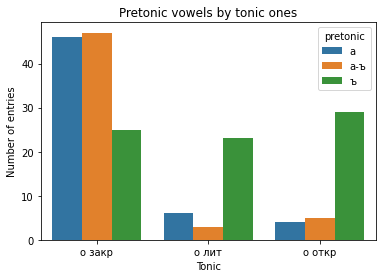

In [18]:
df =summary_table[['pretonic', 'tonic', 'word']].groupby(['tonic', 'pretonic'], as_index=False).count()

df.columns = ['tonic', 'pretonic', 'total']
sns.barplot(x="tonic", y="total", hue='pretonic', data=df)
plt.title('Pretonic vowels by tonic ones')
plt.xlabel('Tonic')
plt.ylabel('Number of entries');

This barplot shows that pretonic [a] and [a-ъ] strongly tend to co-occur with closed o, though [ъ] occurs equally often with all the stressed vowel types.

Below, there are the same data, but from a different perspective.

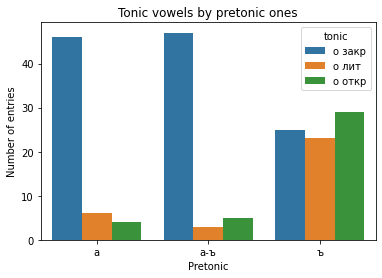

In [19]:
df =summary_table[['pretonic', 'tonic', 'word']].groupby(['tonic','pretonic'], as_index=False).count()

df.columns = ['tonic', 'pretonic', 'total']
sns.barplot(x="pretonic", y="total", hue='tonic', data=df)
plt.title('Tonic vowels by pretonic ones')
plt.xlabel('Pretonic')
plt.ylabel('Number of entries');

Next, let's take a look at the vowel duration since it's another parameter that defines dissimilative akanie.

In [20]:
o_open = pd.read_sql_query('''SELECT word, pretonic, tonic, pre_duration, ton_duration, pre_duration/ton_duration*100 as relative_duration_prctge FROM word
LEFT JOIN pretonic ON word.id = pretonic.id
LEFT JOIN tonic ON word.id = tonic.id WHERE tonic = "о откр"''', con = con)

o_stand = pd.read_sql_query('''SELECT word, pretonic, tonic, pre_duration, ton_duration, pre_duration/ton_duration*100 as relative_duration_prctge FROM word
LEFT JOIN pretonic ON word.id = pretonic.id
LEFT JOIN tonic ON word.id = tonic.id WHERE tonic = "о лит"''', con = con)

o_closed = pd.read_sql_query('''SELECT word, pretonic, tonic, pre_duration, ton_duration, pre_duration/ton_duration*100 as relative_duration_prctge FROM word
LEFT JOIN pretonic ON word.id = pretonic.id
LEFT JOIN tonic ON word.id = tonic.id WHERE tonic = "о закр"''', con = con)

#o_open, o_stand, o_closed

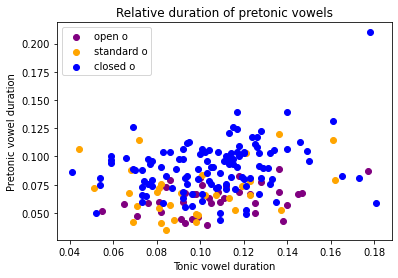

In [21]:
X_o = o_open[['ton_duration']]
Y_o = o_open[['pre_duration']]
X_s = o_stand[['ton_duration']]
Y_s = o_stand[['pre_duration']]
X_c = o_closed[['ton_duration']]
Y_c = o_closed[['pre_duration']]


plt.scatter(X_o, Y_o, color='purple', label='open o') # changing the color, adding labels
plt.scatter(X_s, Y_s, color='orange', label='standard o') # adding a second group of data
plt.scatter(X_c, Y_c, color='blue', label='closed o')
plt.title('Relative duration of pretonic vowels') # the title
plt.ylabel('Pretonic vowel duration')
plt.xlabel('Tonic vowel duration')
plt.legend(loc='best') # the legend is located automatically in the best possible place
plt.show()

This scatterplot shows that vowels that preceed closed o tend to be longer than the ones preceding open o's, which actually follows dissimilative akanie pattern.

The boxplot below shows that the longer pretonic vowels are [a]-like, and it also follows the expected pattern.

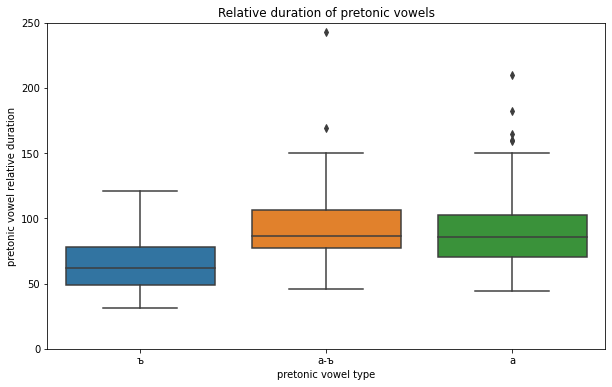

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="pretonic", y="relative_duration_prctge", data=summary_table)
plt.ylim((0, 250))
plt.title('Relative duration of pretonic vowels')
plt.ylabel('pretonic vowel relative duration')
plt.xlabel('pretonic vowel type');

The next plots show the ratio of pretonic and tonic vowels in all the words that were elicitated. It is not illustrative for this very study, but could be usefull if we worked with many more words, had a representative sample and wanted to find out with which vowel types are more frequent in loanwords.

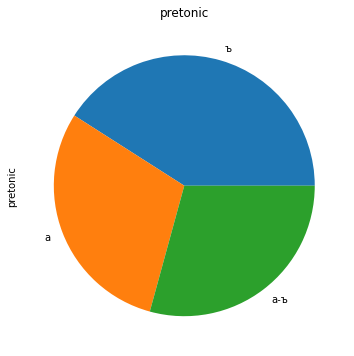

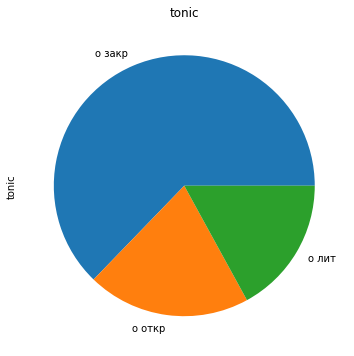

In [23]:
plt.figure(figsize=(6, 6))
summary_table['pretonic'].value_counts().plot(kind='pie');
plt.title('pretonic');

plt.figure(figsize=(6, 6))
summary_table['tonic'].value_counts().plot(kind='pie');
plt.title('tonic');

Thus, so far the data have followed the archaic dissimilative akanie pattern, but let's also run chi-squared test to see if there really is a dependency between pretonic and tonic vowels (I'll limit myself to vowel quality comparison). So, the Null hypothesis is that there is no dependency, and Alternative hypothesis is there is some. I'll set significance level to 5%.

In [24]:
import scipy

In [25]:
cont_table = pd.crosstab(summary_table['pretonic'], summary_table['tonic']) #this is the contigency table
cont_table

tonic,о закр,о лит,о откр
pretonic,,,
а,46,6,4
а-ъ,47,3,5
ъ,25,23,29


In [26]:
chi2, prob, df, expected = scipy.stats.chi2_contingency(cont_table)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
print(output.format( chi2, df, prob))
print(expected)

test Statistics: 51.92051753999792
degrees of freedom: 4
p-value: 1.4332664128516008e-10

[[35.14893617  9.53191489 11.31914894]
 [34.5212766   9.36170213 11.11702128]
 [48.32978723 13.10638298 15.56382979]]


As you can see, p-value is much lower than the threshold that was set, so null hypothesis is denied, which means there **is** dependency between two vowels as supported by the visualizations above.